In [10]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib
import matplotlib
import matplotlib.pyplot as plt

In [55]:
data_dir = "../data/"
results_file = 'softmax_valid_results_5000.pickle'
data_file = 'tf_data_mean.pickle'
nb_file = "nb_preds.pickle"
svm_file = "svm_preds.pickle"

with open(data_dir + results_file, 'rb') as f:
    results = pickle.load(f)

with open(data_dir + data_file, 'rb') as f:
    data = pickle.load(f)

with open(data_dir + nb_file, 'rb') as f:
    nb_preds = pickle.load(f)

with open(data_dir + svm_file, 'rb') as f:
    svm_preds = pickle.load(f)
    
valid_labels = np.matrix(data['validate_labels'], dtype='float32')

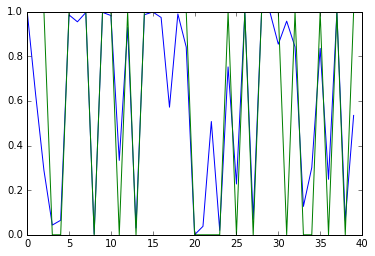

In [26]:
plt.plot(results_5[::10])
plt.plot(labels_5[::10])
plt.show()

LABEL 0


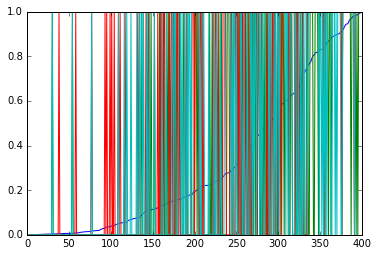

LABEL 1


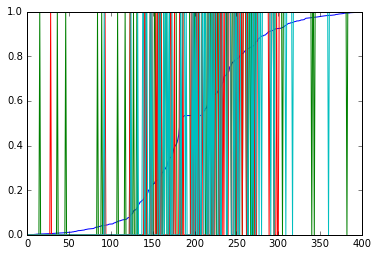

LABEL 2


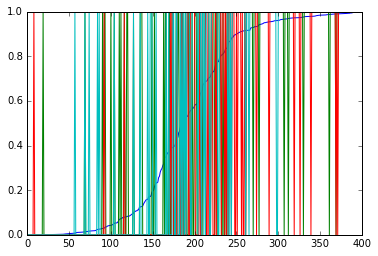

LABEL 3


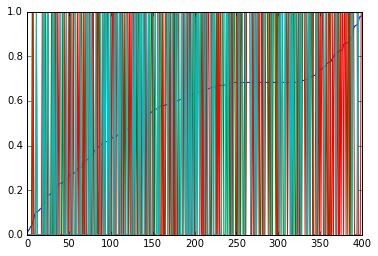

LABEL 4


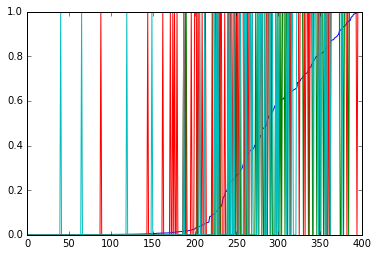

LABEL 5


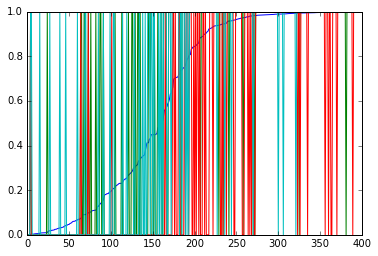

LABEL 6


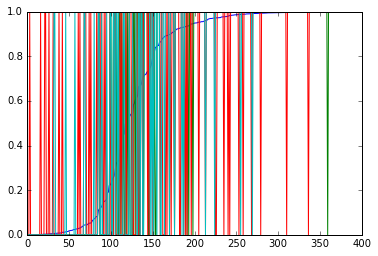

LABEL 7


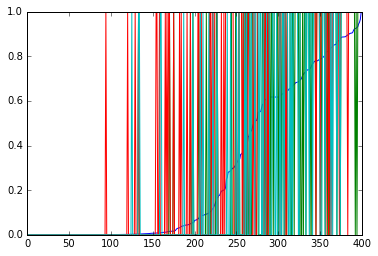

LABEL 8


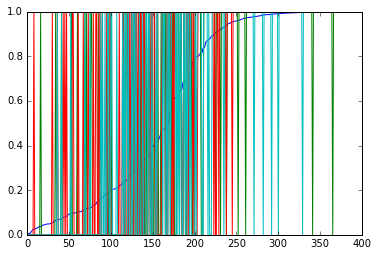

In [40]:
for i in range(9):
    sort_idx = np.ravel(np.argsort(results[:,i], axis=0))
    plt.plot(np.sort(results[:,i], axis=0))
    plt.plot(data["validate_labels"][:,i][sort_idx])
    plt.plot(nb_preds[:,i][sort_idx])
    plt.plot(svm_preds[:,i][sort_idx])
    print "LABEL " + str(i)
    plt.show()

# 0 : 0.695 0.73 0.775 0.755


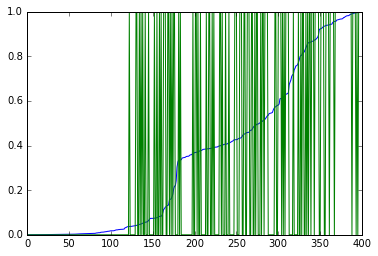

# 1 : 0.8 0.8025 0.8475 0.835


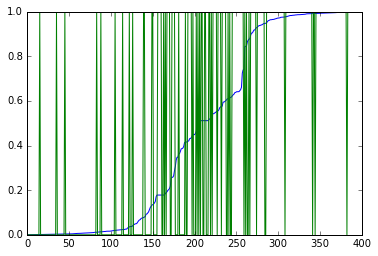

# 2 : 0.825 0.84 0.85 0.865


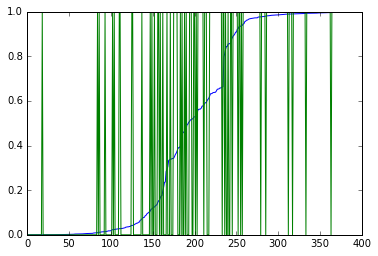

# 3 : 0.5275 0.6275 0.6375 0.625


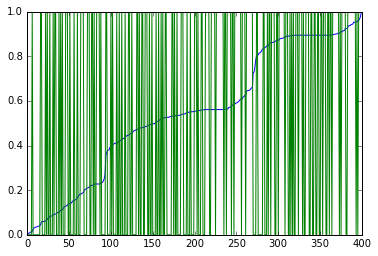

# 4 : 0.785 0.845 0.88 0.87


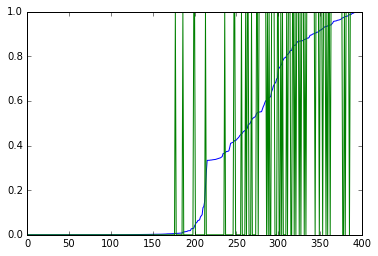

# 5 : 0.79 0.8375 0.8925 0.89


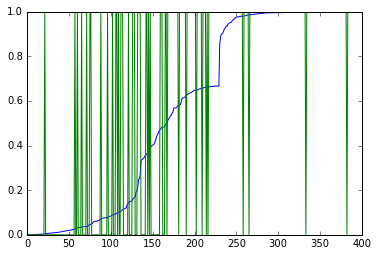

# 6 : 0.82 0.8825 0.9175 0.9075


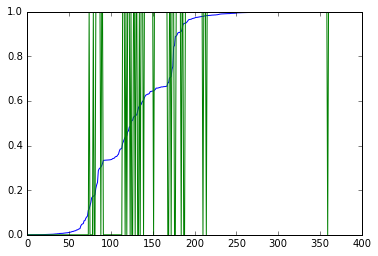

# 7 : 0.7825 0.8325 0.855 0.8525


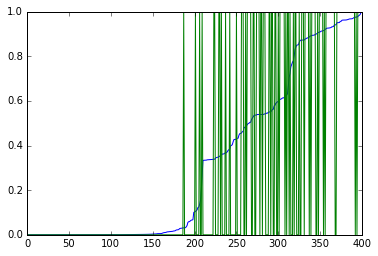

# 8 : 0.8025 0.84 0.8525 0.87


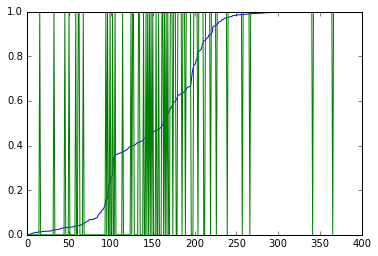

In [64]:
for i in range (9):
    multi_pred = (nb_preds[:,i] + svm_preds[:,i] + np.ravel(results[:,i])) / 3.0
    sort_idx = np.ravel(np.argsort(multi_pred, axis=0))
    plt.plot(np.sort(multi_pred, axis=0))
    plt.plot(valid_labels[:,i][sort_idx])
    print "#", i, ":", np.sum(np.equal(
            np.round(nb_preds[:,i]), np.ravel(valid_labels[:,i])
        )) * 1.0 / len(nb_preds[:,i]), np.sum(np.equal(
            np.round(svm_preds[:,i]), np.ravel(valid_labels[:,i])
        )) * 1.0 / len(svm_preds[:,i]), np.sum(np.equal(
            np.round(np.ravel(results[:,i])), np.ravel(valid_labels[:,i])
        )) * 1.0 / len(np.ravel(results[:,i])), np.sum(np.equal(
            np.round(multi_pred), np.ravel(valid_labels[:,i])
        )) * 1.0 / len(multi_pred)
    plt.show()

In [ ]:
#print test_bids
test_results_old = test_results
test_results[:,3] = 0.
test_results_bin = np.array(np.round(test_results), dtype=bool)
output = "business_id,labels\n"

for i in range(len(test_bids)):
    if (i % 500 == 0):
        print i
    tags = np.argwhere(test_results_bin[i])
    tags_str = ' '.join('%d'%F for F in tags[:] )
    output += test_bids[i]+ "," + tags_str + "\n"
    
print output
f = open('test_submission_binary_labels_nn_noL2_5K_zero_cat_3', 'w')
f.write(output)
f.close()